<a href="https://colab.research.google.com/github/kapamawi/AI/blob/main/2_8_2__trzechAgentow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!pip install -q openai==1.55.3 httpx==0.27.2 --force-reinstall --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.6/343.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.0/457.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.

Ten kod instaluje dwie biblioteki Pythona za pomocą narzędzia pip:

1. openai w konkretnej wersji 1.55.3
2. httpx w wersji 0.27.2

Flagi użyte w poleceniu:
- `-q` (quiet) - ogranicza wyświetlanie komunikatów podczas instalacji
- `--force-reinstall` - wymusza ponowną instalację, nawet jeśli dana wersja biblioteki jest już zainstalowana
- `--quiet` - dodatkowe wyciszenie komunikatów

To konkretne połączenie bibliotek i wersji jest często używane do pracy z API OpenAI. Biblioteka httpx służy do wykonywania asynchronicznych żądań HTTP, co jest przydatne przy komunikacji z API.

In [ ]:
!pip install -q "autogen-agentchat[lmm]~=0.2"

To polecenie instaluje pakiet autogen-agentchat z modyfikatorem [lmm] w wersji około 0.2.

Rozbijając na części:
- `autogen-agentchat` to główna biblioteka
- `[lmm]` to dodatkowe zależności związane z obsługą modeli językowych
- `~=0.2` oznacza, że zostanie zainstalowana wersja 0.2.x, gdzie x to najnowsza dostępna wersja poprawkowa
- `-q` wycisza większość komunikatów podczas instalacji

AutoGen to framework do tworzenia i orkiestracji wielu agentów AI, którzy mogą współpracować ze sobą przy wykonywaniu zadań. Modyfikator [lmm] dodaje funkcje związane z modelami językowymi.

In [ ]:
import json
import os
import random
import time
from typing import Any, Callable, Dict, List, Optional, Tuple, Type, Union

import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from termcolor import colored

from google.colab import userdata

import autogen
from autogen import Agent, AssistantAgent, ConversableAgent, UserProxyAgent
from autogen.agentchat.contrib.capabilities.vision_capability import VisionCapability
from autogen.agentchat.contrib.img_utils import get_pil_image, pil_to_data_uri
from autogen.agentchat.contrib.multimodal_conversable_agent import MultimodalConversableAgent
from autogen.code_utils import content_str

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Ten kod importuje szereg bibliotek i narzędzi potrzebnych do pracy z agentami AI i przetwarzania danych:

Biblioteki standardowe:
- `json` do obsługi formatu JSON
- `os` do operacji na systemie plików
- `random` do generowania losowych wartości
- `time` do operacji związanych z czasem
- `typing` zawiera typy do adnotacji kodu

Biblioteki do wizualizacji i obróbki danych:
- `matplotlib.pyplot` do tworzenia wykresów
- `numpy` do obliczeń numerycznych
- `PIL` (Python Imaging Library) do pracy z obrazami
- `termcolor` do kolorowego wyświetlania tekstu w terminalu

Narzędzia Google Colab:
- `userdata` do zarządzania danymi użytkownika

Komponenty AutoGen:
- Podstawowe klasy agentów: `Agent`, `AssistantAgent`, `ConversableAgent`, `UserProxyAgent`
- `VisionCapability` do obsługi zadań związanych z widzeniem maszynowym
- Funkcje pomocnicze do pracy z obrazami
- `MultimodalConversableAgent` do obsługi wielu typów danych
- `content_str` do pracy z zawartością wiadomości

In [ ]:
# configs
openai_api = userdata.get('openaivision')


In [ ]:
config_list_4v =   [ { 'model': "gpt-4o-mini", 'api_key': openai_api} ]

config_list_gpt4 =   [ { 'model': "gpt-4o-mini", 'api_key': openai_api} ]

gpt4_llm_config = {"config_list": config_list_gpt4, "cache_seed": 42}


Ten fragment kodu definiuje konfiguracje dla modeli językowych:

`config_list_4v` i `config_list_gpt4` to identyczne listy zawierające po jednym słowniku z konfiguracją:
- model ustawiony na "gpt-4o-mini"
- klucz API do OpenAI zapisany w zmiennej `openai_api`

`gpt4_llm_config` to słownik z dwoma elementami:
- `config_list`: ustawiony na wcześniej zdefiniowaną listę `config_list_gpt4`
- `cache_seed`: ustawiony na 42, co zapewnia powtarzalność wyników przy użyciu pamięci podręcznej


# Functions

In [ ]:
class FigureCreator(ConversableAgent):
    def __init__(self, n_iters=2, **kwargs):
        """
        Initializes a FigureCreator instance.

        This agent facilitates the creation of visualizations through a collaborative effort among its child agents: commander, coder, and critics.

        Parameters:
            - n_iters (int, optional): The number of "improvement" iterations to run. Defaults to 2.
            - **kwargs: keyword arguments for the parent AssistantAgent.
        """
        super().__init__(**kwargs)
        self.register_reply([Agent, None], reply_func=FigureCreator._reply_user, position=0)
        self._n_iters = n_iters

    def _reply_user(self, messages=None, sender=None, config=None):
        if all((messages is None, sender is None)):
            error_msg = f"Either {messages=} or {sender=} must be provided."
            logger.error(error_msg)  # noqa: F821
            raise AssertionError(error_msg)
        if messages is None:
            messages = self._oai_messages[sender]

        user_question = messages[-1]["content"]

        ### Define the agents
        commander = AssistantAgent(
            name="Commander",
            human_input_mode="NEVER",
            max_consecutive_auto_reply=10,
            system_message="Help me run the code, and tell other agents it is in the <img result.jpg> file location.",
            is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
            code_execution_config={"last_n_messages": 3, "work_dir": working_dir, "use_docker": False},
            llm_config=self.llm_config,
        )

        critics = MultimodalConversableAgent(
            name="Critics",
            system_message="""Criticize the input figure. How to replot the figure so it will be better? Find bugs and issues for the figure.
            Pay attention to the color, format, and presentation. Keep in mind of the reader-friendliness.
            If you think the figures is good enough, then simply say NO_ISSUES""",
            llm_config={"config_list": config_list_4v, "max_tokens": 300},
            human_input_mode="NEVER",
            max_consecutive_auto_reply=1,

        )

        coder = AssistantAgent(
            name="Coder",
            llm_config=self.llm_config,
        )

        coder.update_system_message(
            coder.system_message
            + "ALWAYS save the figure in `result.jpg` file. Tell other agents it is in the <img result.jpg> file location."
        )

        # Data flow begins
        commander.initiate_chat(coder, message=user_question)
        img = Image.open(os.path.join(working_dir, "result.jpg"))
        plt.imshow(img)
        plt.axis("off")  # Hide the axes
        plt.show()

        for i in range(self._n_iters):
            commander.send(
                message=f"Improve <img {os.path.join(working_dir, 'result.jpg')}>",
                recipient=critics,
                request_reply=True,
            )

            feedback = commander._oai_messages[critics][-1]["content"]
            if feedback.find("NO_ISSUES") >= 0:
                break
            commander.send(
                message="Here is the feedback to your figure. Please improve! Save the result to `result.jpg`\n"
                + feedback,
                recipient=coder,
                request_reply=True,
            )
            img = Image.open(os.path.join(working_dir, "result.jpg"))
            plt.imshow(img)
            plt.axis("off")
            plt.show()

        return True, os.path.join(working_dir, "result.jpg")

Ta klasa `FigureCreator` dziedziczy po `ConversableAgent` i służy do tworzenia oraz iteracyjnego ulepszania wizualizacji przy pomocy trzech agentów:

1. `Commander` - agent nadzorujący, który:
   - Zarządza procesem tworzenia wizualizacji
   - Nie przyjmuje danych od człowieka
   - Może automatycznie odpowiedzieć maksymalnie 10 razy
   - Wykonuje kod w katalogu roboczym bez użycia Dockera
   - Informuje inne agenty o lokalizacji pliku wynikowego

2. `Critics` - agent oceniający, który:
   - Analizuje utworzoną wizualizację
   - Ocenia kolory, format i czytelność
   - Zwraca "NO_ISSUES" jeśli wykres jest zadowalający
   - Może przetwarzać dane różnego typu (multimodalne)
   - Ma limit 300 tokenów na odpowiedź

3. `Coder` - agent programista, który:
   - Tworzy i modyfikuje kod generujący wizualizację
   - Zapisuje wynik jako plik 'result.jpg'

Proces działania:
1. Commander zleca Coderowi utworzenie pierwszej wersji wykresu
2. Wykres jest wyświetlany
3. Przez zadaną liczbę iteracji (domyślnie 2):
   - Critics ocenia wykres
   - Jeśli nie ma uwag (NO_ISSUES), proces kończy się
   - W przeciwnym razie Coder wprowadza poprawki według sugestii
   - Nowa wersja jest wyświetlana

Na końcu zwracana jest flaga sukcesu oraz ścieżka do pliku wynikowego.

# Test

In [ ]:
working_dir = "/content/tmp/"

User (to Figure Creator~):


Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low. Only use the first 50 observations.


--------------------------------------------------------------------------------
Commander (to Coder):


Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low. Only use the first 50 observations.


--------------------------------------------------------------------------------
Coder (to Commander):

To plot the figure showing both high and low temperatures from the Seattle weather data, I will first retrieve the data from the specified URL, process it to select the first 50 observations, and then generate a plot. 

Here’s the plan:
1. Download the CSV file from the provided URL.
2. Read the CSV data and extract the first 50 observations for high and l

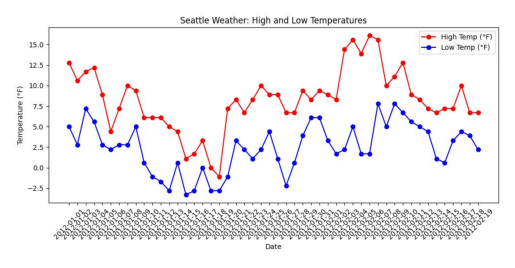

Commander (to Critics):

Improve <image>

--------------------------------------------------------------------------------
Critics (to Commander):

Here are some suggestions to improve the figure:

1. **Date Formatting**: The x-axis dates are crowded and difficult to read. Consider using fewer tick marks, rotating the labels (e.g., 45 degrees), or displaying date ranges (e.g., every week or month).

2. **Y-Axis Grid Lines**: Adding horizontal grid lines can help improve readability and allow for easier visual comparisons between high and low temperatures.

3. **Color Contrast**: Ensure that the colors of the lines are distinct against the background. If the background is light, slightly darker or more saturated colors for the lines can help.

4. **Legend Placement**: The legend could be positioned more strategically, such as inside the plot area but in a non-intrusive manner, to save space and avoid overlap with the data.

5. **Marker Style**: Use different marker shapes for high and l

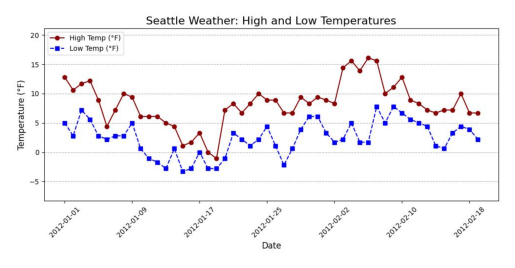

Commander (to Critics):

Improve <image>

--------------------------------------------------------------------------------
Commander (to Coder):

Here is the feedback to your figure. Please improve! Save the result to `result.jpg`
Improve <img /content/tmp/result.jpg>

--------------------------------------------------------------------------------
Coder (to Commander):

To further improve the figure based on your feedback, I will make additional enhancements. Potential improvements can include:

1. **Background Color**: Adding a subtle background color to enhance contrast with line colors.
2. **More Distinct Marker Styles**: Using different marker colors or sizes for better differentiation.
3. **Highlighting Significant Events**: If there are notable temperature spikes or drops, consider annotating those points.
4. **Adding a Secondary Y-Axis**: If relevant, introducing a secondary axis for additional data representation.
5. **Adjusting Line Styles**: Creating even more distinction be

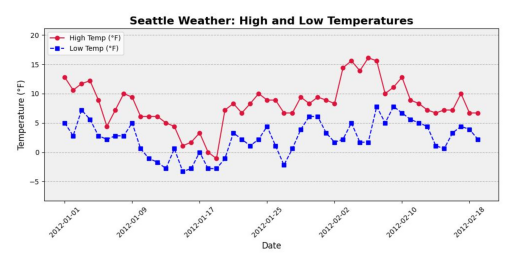

Figure Creator~ (to User):

/content/tmp/result.jpg

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': '\nPlot a figure by using the data from:\nhttps://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv\n\nI want to show both temperature high and low. Only use the first 50 observations.\n', 'role': 'assistant', 'name': 'User'}, {'content': '/content/tmp/result.jpg', 'role': 'user', 'name': 'Figure Creator~'}], summary='/content/tmp/result.jpg', cost={'usage_including_cached_inference': {'total_cost': 0}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=[])

In [ ]:
creator = FigureCreator(name="Figure Creator~", llm_config=gpt4_llm_config)

user_proxy = autogen.UserProxyAgent(
    name="User", human_input_mode="NEVER", max_consecutive_auto_reply=0, code_execution_config={"use_docker": False}
)

user_proxy.initiate_chat(
    creator,
    message="""
Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low. Only use the first 50 observations.
""",
)

Te linie kodu tworzą i konfigurują dwa agenty oraz rozpoczynają ich interakcję:

1. Tworzona jest instancja `FigureCreator` o nazwie "Figure Creator~" z konfiguracją modelu językowego zdefiniowaną wcześniej w `gpt4_llm_config`.

2. Tworzony jest agent `UserProxyAgent` o następujących parametrach:
   - nazwa: "User"
   - `human_input_mode="NEVER"` - nie przyjmuje danych od człowieka
   - `max_consecutive_auto_reply=0` - nie może automatycznie wysyłać wielu odpowiedzi
   - wykonuje kod bez użycia Dockera

3. Rozpoczynana jest rozmowa między agentami poprzez `initiate_chat`. Zadanie polega na:
   - Pobranie danych pogodowych dla Seattle z podanego URL
   - Stworzenie wykresu pokazującego wysokie i niskie temperatury
   - Użycie tylko pierwszych 50 obserwacji z zbioru danych

Agenty będą współpracować, aby pobrać dane, przetworzyć je i stworzyć odpowiednią wizualizację według podanych wymagań.